In [1]:
# Load packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 4th Order Runge-Kutta Implementation

# Define function that incorporates a a quadratic term as a drag
g     = 9.8         #gravity
c_d   = 0.45        # c_d parameter
rho   = 1.0         #density
area  = 1.26*10**-3 #cross sectional area of ping pong ball in m^2
mass  = 2.7*10**-3 #mass of ping pong ball in kg
gamma = .5*(1/mass)*rho*area*c_d

def drag(v_, a = gamma):
  """
  Function that incorporates a quadratic term as a drag
  Parameters
  ----------
  v_ : Float
        Value of v
  g : Float
        Value of g
  """
  return a*np.square(v_) - g

# Implementing solver as a function
def rk4_drag(f,t0: float,tN: float, N: int):
  """
  Runge-Kutta Implementation:

  """
  t = np.linspace(t0, tN, N)
  v = np.zeros(N)
  y = np.zeros(N)
  h = (tN-t0)/N
  for n in range(1, N):
    k1 = h*f(v[n-1]       )
    k2 = h*f(v[n-1] + k1/2)
    k3 = h*f(v[n-1] + k2/2)
    k4 = h*f(v[n-1] + k3  )

    v[n] = v[n-1] + (k1 + 2*k2 + 2*k3 + k4)/6
    y[n] = y[n-1] + v[n]*h
  return t, y, v

In [3]:
# Define initial conditions and number of steps
t0 = 0.0
tf = 5.0
N  = 10
# Solve the ODE
solver_drag = rk4_drag(drag, t0, tf, N)

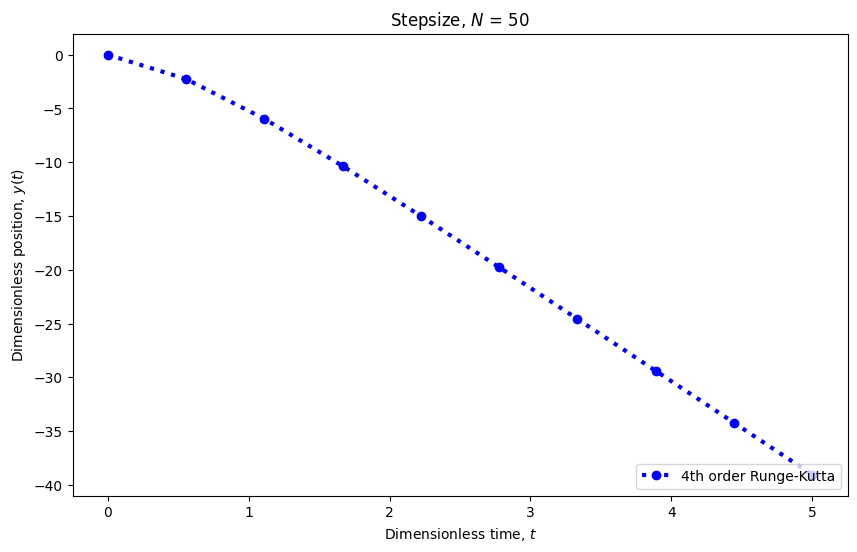

In [4]:
# Plot the solution
plt.figure(figsize=(10,6))
plt.plot(solver_drag[0],solver_drag[1],':bo' , linewidth=3.0,label=r'4th order Runge-Kutta')
plt.ylabel(r'Dimensionless position, $y(t)$')
plt.xlabel(r'Dimensionless time, $t$')
plt.title(r'Stepsize, $N$ = %i' % 50)
plt.legend(loc=4)
plt.show()

In [5]:
# Implementing solver as a function
def euler_drag(f,t0: float,tN: float, N: int)->tuple:
    t = np.linspace(t0, tN, N)
    v    = np.zeros([N])
    y    = np.zeros([N])
    h = (tN-t0)/N
    for i in range(1,N):
        v[i] = v[i-1] + h*f(v[i-1])
        y[i] = y[i-1] + h*v[i]
    return t, y, v

In [6]:
solver2_drag = euler_drag(drag, t0, tf, N)

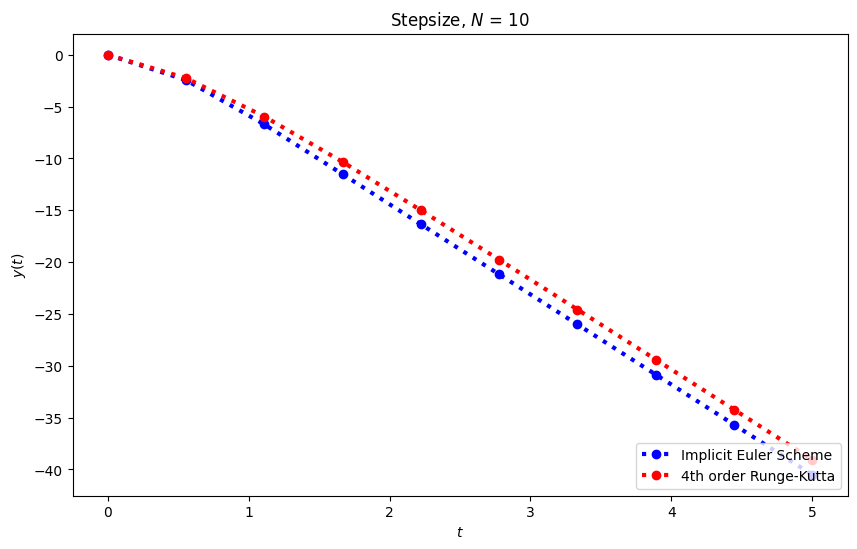

In [7]:
# Plot the solution
plt.figure(figsize=(10,6))
plt.plot(solver2_drag[0],solver2_drag[1],':bo' , linewidth=3.0,label=r'Implicit Euler Scheme')
plt.plot(solver_drag[0], solver_drag[1],':ro' , linewidth=3.0,  label=r'4th order Runge-Kutta')
plt.ylabel(r'$y(t)$')
plt.xlabel(r'$t$')
plt.title(r'Stepsize, $N$ = {}'.format(N))
plt.legend(loc=4)
plt.show()